In [1]:
import numpy as np
import argparse
import os, time


from pykin.utils import plot_utils as p_utils


from pytamp.benchmark import Rearrange1
from pytamp.benchmark.rearrange1 import make_scene
from pytamp.search.mcts_for_rearragement import MCTS_rearrangement

def get_parser():
    parser = argparse.ArgumentParser(description="Test Rearragement 1.")
    parser.add_argument("--budgets", metavar="T", type=int, default=100, help="Horizon")
    parser.add_argument("--max_depth", metavar="H", type=int, default=10, help="Max depth")
    parser.add_argument("--seed", metavar="i", type=int, default=7, help="A random seed")
    parser.add_argument(
        "--algo",
        metavar="alg",
        type=str,
        default="bai_perturb",
        choices=["bai_perturb", "bai_ucb", "uct", "random", "greedy"],
        help="Choose one (bai_perturb, bai_ucb, uct)",
    )
    parser.add_argument(
        "--debug_mode", default=False, type=lambda x: (str(x).lower() == "true"), help="Debug mode"
    )
#     parser.add_argument("--box_number", metavar="N", type=int, default=6, help="Box Number(6 or less)")
    try:
        args = parser.parse_args() #call from command line
    except:
        args = parser.parse_args(args=[]) #call from notebook
    return args 

args = get_parser() 

debug_mode = args.debug_mode
budgets = args.budgets
max_depth = args.max_depth
algo = args.algo
seed = args.seed
np.random.seed(seed)

object_names, init_scene, goal_scene = make_scene()
rearrangement1 = Rearrange1('doosan', object_names, init_scene, goal_scene, is_pyplot=False)

final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []

# final_optimal_trees = []
c_list = 10 ** np.linspace(-2, 2.0, 10)


usage: ipykernel_launcher.py [-h] [--budgets T] [--max_depth H] [--seed i]
                             [--algo alg] [--debug_mode DEBUG_MODE]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/juju/.local/share/jupyter/runtime/kernel-32bd3ca8-944b-47d3-9cf0-b7e5173d33af.json


*********************** Logical States ***********************
OrderedDict([('ben_cube0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('can0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('can1',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('milk0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('cereal0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('table',
              {'static': True,
               'support': [Object(name=ben_cube0, pos=[0.60115642 0.51399047 0.84779998]),
                           Object(name=can0, pos=[0.47888463 0.15004324 0.85059666]),
                           Object(name=can1, pos=[0.34656674 0.36448523 0.85059666]),
                           Object(name=milk0, pos=[0.39059745 0.16715493 0.87809554]),
                           Object(name=cereal0, pos=[0.4748

# Start Scene 

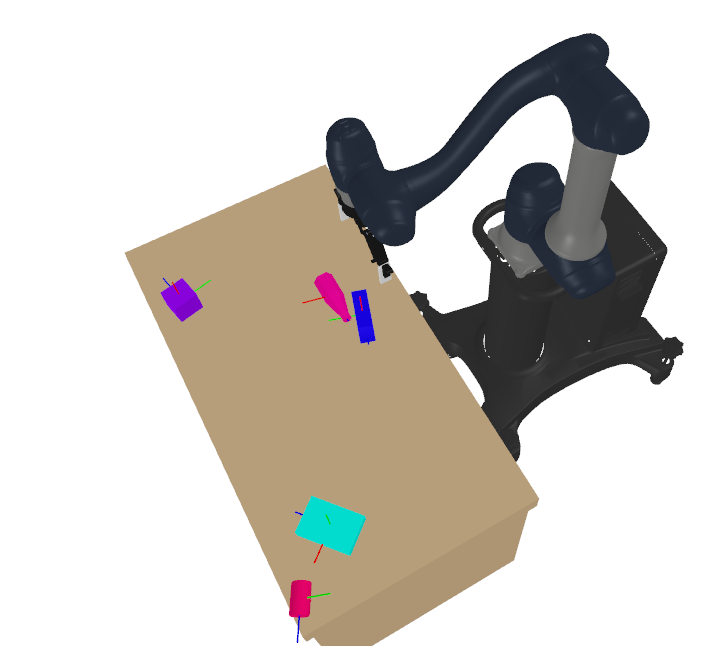

{'table': Object(name=table, pos=[ 0.9   -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[0.60115642 0.51399047 0.84779998]), 'can0': Object(name=can0, pos=[0.47888463 0.15004324 0.85059666]), 'can1': Object(name=can1, pos=[0.34656674 0.36448523 0.85059666]), 'milk0': Object(name=milk0, pos=[0.39059745 0.16715493 0.87809554]), 'cereal0': Object(name=cereal0, pos=[0.47488932 0.08537851 0.88526188])}


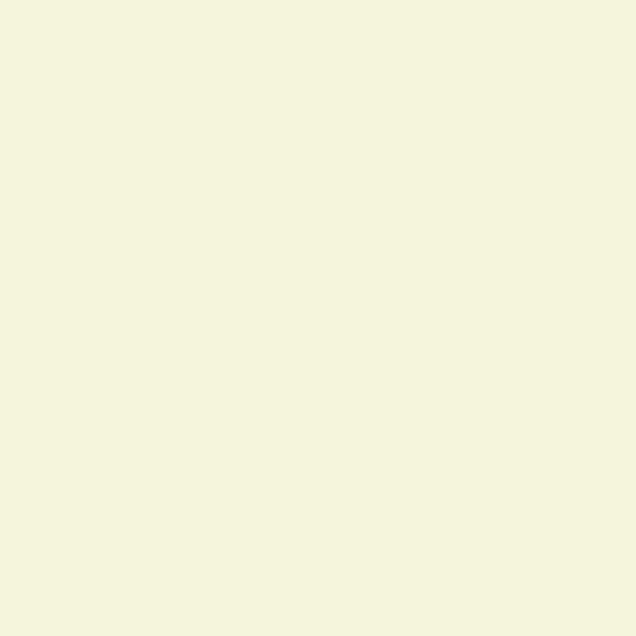

In [2]:
#######################
fig, ax = p_utils.init_3d_figure(name="Rearrangement 1")
# init_scene
rearrangement1.scene_mngr.render_scene(ax)
rearrangement1.render_axis(rearrangement1.scene_mngr)
rearrangement1.scene_mngr.show()

# Goal Scene 

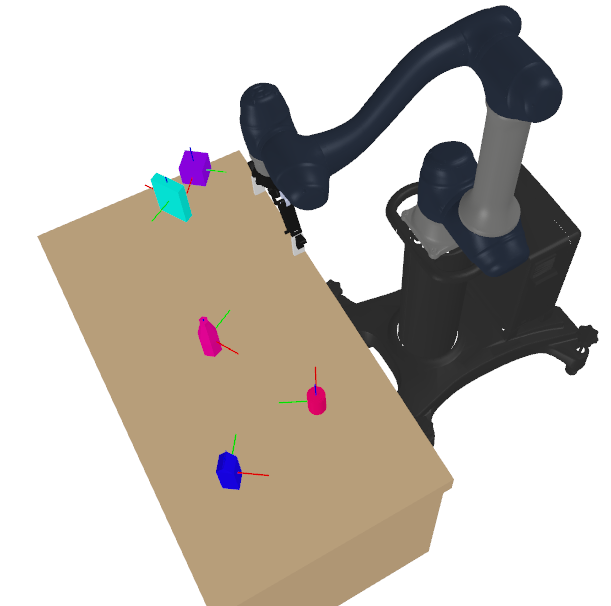

In [3]:
# goal_scene
rearrangement1.goal_scene_mngr.render_scene(ax)
rearrangement1.render_axis(rearrangement1.goal_scene_mngr)
rearrangement1.goal_scene_mngr.show()

{'table': Object(name=table, pos=[ 0.9   -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[0.72281272 0.59748099 0.84779998]), 'can0': Object(name=can0, pos=[0.39291595 0.2714404  0.85059666]), 'can1': Object(name=can1, pos=[0.59015626 0.33879051 0.85059666]), 'milk0': Object(name=milk0, pos=[0.51595831 0.31388507 0.87809554]), 'cereal0': Object(name=cereal0, pos=[ 0.43606131 -0.5273856   0.88526188])}


In [2]:
c = 3
idx = 0
mcts = MCTS_rearrangement(
        scene_mngr=rearrangement1.scene_mngr,
        init_scene=rearrangement1.init_scene,
        sampling_method=args.algo,
        budgets=args.budgets,
        max_depth=args.max_depth,
        c=c,
        debug_mode=args.debug_mode,
    )
mcts.only_optimize_1 = False

In [3]:
start_time = time.time()
for i in range(budgets):
    print(
        f"\n[{idx+1}/{len(c_list)}] Benchmark: {rearrangement1.scene_mngr.scene.bench_num}, Algo: {algo}, C: {c}, Seed: {seed}"
    )
    mcts.do_planning_rearrange(i)

    print("########### Running time : ", time.time()- start_time, "##############")
    final_level_1_values.append(mcts.values_for_level_1)



[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 7
=========== Search iteration : 1 ===========
[Action] Rearr can0
# next_scene rearr_num :  1
Good Action
[Reward] S(0) -> A(4) -> S'(11) Reward : 5.0
[Action] Rearr can1
# next_scene rearr_num :  1
placed another place not goal
[Reward] S(11) -> A(14) -> S'(20) Reward : -1
[Action] Rearr ben_cube0
# next_scene rearr_num :  1
placed another place not goal
[Reward] S(20) -> A(21) -> S'(29) Reward : -1
[Action] Rearr cereal0
# next_scene rearr_num :  1
placed another place not goal
[Reward] S(29) -> A(36) -> S'(38) Reward : -1
[Action] Rearr can0
# next_scene rearr_num :  1
not bad Action
[Reward] S(38) -> A(42) -> S'(47) Reward : -1
[Action] Rearr milk0
# next_scene rearr_num :  2
Good Action
[Reward] S(47) -> A(52) -> S'(55) Reward : 1.429
[Action] Rearr cereal0
# next_scene rearr_num :  3
Good Action
[Reward] S(55) -> A(62) -> S'(63) Reward : 1.25
[Action] Rearr ben_cube0
# next_scene rearr_num :  4
Good Action
[Reward] S(63) -> A(

[Action] Rearr ben_cube0
# next_scene rearr_num :  0
placed another place not goal
[Reward] S(357) -> A(358) -> S'(366) Reward : -1
[Action] Rearr can0
# next_scene rearr_num :  1
Good Action
[Reward] S(366) -> A(368) -> S'(375) Reward : 1.429
[Action] Rearr can1
# next_scene rearr_num :  2
Good Action
[Reward] S(375) -> A(379) -> S'(384) Reward : 1.25
[Action] Rearr cereal0
# next_scene rearr_num :  3
Good Action
[Reward] S(384) -> A(391) -> S'(392) Reward : 1.111
[Action] Rearr can1
# next_scene rearr_num :  3
not bad Action
[Reward] S(392) -> A(397) -> S'(400) Reward : -1
[Action] Rearr cereal0
# next_scene rearr_num :  3
not bad Action
[Reward] S(400) -> A(406) -> S'(407) Reward : -1
Exceeded the maximum depth!!
########### Running time :  8.3970468044281 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 7
=========== Search iteration : 6 ===========
[Action] Rearr can1
# next_scene rearr_num :  1
Good Action
[Reward] S(0) -> A(6) -> S'(408) Reward : 5.0
[Action] 

# next_scene rearr_num :  1
Good Action
[Reward] S(0) -> A(10) -> S'(734) Reward : 5.0
[Action] Rearr ben_cube0
# next_scene rearr_num :  2
Good Action
[Reward] S(734) -> A(735) -> S'(742) Reward : 3.333
[Action] Rearr cereal0
# next_scene rearr_num :  1
Bad Action
[Reward] S(742) -> A(749) -> S'(751) Reward : -6.667
[Action] Rearr can0
# next_scene rearr_num :  1
placed another place not goal
[Reward] S(751) -> A(754) -> S'(759) Reward : -1
[Action] Rearr cereal0
# next_scene rearr_num :  1
placed another place not goal
[Reward] S(759) -> A(766) -> S'(768) Reward : -1
[Action] Rearr milk0
# next_scene rearr_num :  1
placed another place not goal
[Reward] S(768) -> A(775) -> S'(777) Reward : -1
[Action] Rearr can0
# next_scene rearr_num :  2
Good Action
[Reward] S(777) -> A(781) -> S'(786) Reward : 1.25
[Action] Rearr can1
# next_scene rearr_num :  2
placed another place not goal
[Reward] S(786) -> A(789) -> S'(794) Reward : -1
[Action] Rearr cereal0
# next_scene rearr_num :  3
Good Ac

[Action] Rearr cereal0
# next_scene rearr_num :  2
Good Action
[Reward] S(1028) -> A(1035) -> S'(1036) Reward : 1.667
[Action] Rearr can1
# next_scene rearr_num :  3
Good Action
[Reward] S(1036) -> A(1042) -> S'(1045) Reward : 1.429
[Action] Rearr cereal0
# next_scene rearr_num :  2
Bad Action
[Reward] S(1045) -> A(1051) -> S'(1053) Reward : -2.857
[Action] Rearr ben_cube0
# next_scene rearr_num :  2
placed another place not goal
[Reward] S(1053) -> A(1054) -> S'(1061) Reward : -1
[Action] Rearr can1
# next_scene rearr_num :  1
Bad Action
[Reward] S(1061) -> A(1064) -> S'(1070) Reward : -2.222
[Action] Rearr milk0
# next_scene rearr_num :  2
Good Action
[Reward] S(1070) -> A(1074) -> S'(1077) Reward : 0.909
Exceeded the maximum depth!!
########### Running time :  22.248130321502686 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 7
=========== Search iteration : 15 ===========
[Action] Rearr cereal0
# next_scene rearr_num :  0
placed another place not goal
[Reward] S

[Action] Rearr milk0
# next_scene rearr_num :  2
Good Action
[Reward] S(1351) -> A(1357) -> S'(1360) Reward : 0.909
Exceeded the maximum depth!!
########### Running time :  27.99735999107361 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 7
=========== Search iteration : 19 ===========
[Action] Rearr can1
# next_scene rearr_num :  1
Good Action
[Reward] S(0) -> A(6) -> S'(408) Reward : 5.0
[Action] Rearr ben_cube0
# next_scene rearr_num :  2
Good Action
[Reward] S(408) -> A(410) -> S'(1361) Reward : 3.333
[Action] Rearr milk0
# next_scene rearr_num :  3
Good Action
[Reward] S(1361) -> A(1367) -> S'(1370) Reward : 2.5
[Action] Rearr can0
# next_scene rearr_num :  3
placed another place not goal
[Reward] S(1370) -> A(1373) -> S'(1379) Reward : -1
[Action] Rearr cereal0
# next_scene rearr_num :  4
Good Action
[Reward] S(1379) -> A(1387) -> S'(1388) Reward : 1.667
[Action] Rearr ben_cube0
# next_scene rearr_num :  3
Bad Action
[Reward] S(1388) -> A(1389) -> S'(1397) Rew

[Action] Rearr can0
# next_scene rearr_num :  0
placed another place not goal
[Reward] S(1655) -> A(1658) -> S'(1663) Reward : -1
[Action] Rearr cereal0
# next_scene rearr_num :  0
placed another place not goal
[Reward] S(1663) -> A(1670) -> S'(1672) Reward : -1
[Action] Rearr milk0
# next_scene rearr_num :  1
Good Action
[Reward] S(1672) -> A(1679) -> S'(1680) Reward : 1.429
[Action] Rearr cereal0
# next_scene rearr_num :  2
Good Action
[Reward] S(1680) -> A(1687) -> S'(1688) Reward : 1.25
[Action] Rearr ben_cube0
# next_scene rearr_num :  2
placed another place not goal
[Reward] S(1688) -> A(1689) -> S'(1697) Reward : -1
[Action] Rearr milk0
# next_scene rearr_num :  1
Bad Action
[Reward] S(1697) -> A(1702) -> S'(1706) Reward : -2.222
[Action] Rearr can0
# next_scene rearr_num :  1
placed another place not goal
[Reward] S(1706) -> A(1708) -> S'(1714) Reward : -1
Exceeded the maximum depth!!
########### Running time :  34.945133209228516 ##############

[1/10] Benchmark: 0, Algo: bai_

[Action] Rearr can0
# next_scene rearr_num :  2
placed another place not goal
[Reward] S(1982) -> A(1983) -> S'(1991) Reward : -1
[Action] Rearr cereal0
# next_scene rearr_num :  3
Good Action
[Reward] S(1991) -> A(1999) -> S'(2000) Reward : 0.909
Exceeded the maximum depth!!
########### Running time :  40.51524114608765 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 7
=========== Search iteration : 28 ===========
[Action] Rearr ben_cube0
# next_scene rearr_num :  0
placed another place not goal
[Reward] S(0) -> A(1) -> S'(91) Reward : -1
[Action] Rearr milk0
# next_scene rearr_num :  0
placed another place not goal
[Reward] S(91) -> A(96) -> S'(2001) Reward : -1
[Action] Rearr can0
# next_scene rearr_num :  0
placed another place not goal
[Reward] S(2001) -> A(2004) -> S'(2009) Reward : -1
[Action] Rearr cereal0
# next_scene rearr_num :  0
placed another place not goal
[Reward] S(2009) -> A(2016) -> S'(2017) Reward : -1
[Action] Rearr milk0
# next_scene rearr_num 

[Action] Rearr can0
# next_scene rearr_num :  3
not bad Action
[Reward] S(2293) -> A(2297) -> S'(2302) Reward : -1
[Action] Rearr can1
# next_scene rearr_num :  3
not bad Action
[Reward] S(2302) -> A(2306) -> S'(2311) Reward : -1
[Action] Rearr ben_cube0
# next_scene rearr_num :  3
placed another place not goal
[Reward] S(2311) -> A(2312) -> S'(2320) Reward : -1
[Action] Rearr can1
# next_scene rearr_num :  2
Bad Action
[Reward] S(2320) -> A(2323) -> S'(2329) Reward : -2.857
[Action] Rearr ben_cube0
# next_scene rearr_num :  2
placed another place not goal
[Reward] S(2329) -> A(2330) -> S'(2337) Reward : -1
[Action] Rearr milk0
# next_scene rearr_num :  2
not bad Action
[Reward] S(2337) -> A(2343) -> S'(2346) Reward : -1
[Action] Rearr cereal0
# next_scene rearr_num :  2
placed another place not goal
[Reward] S(2346) -> A(2353) -> S'(2355) Reward : -1
Exceeded the maximum depth!!
########### Running time :  48.003172874450684 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3

# next_scene rearr_num :  0
placed another place not goal
[Reward] S(2614) -> A(2618) -> S'(2621) Reward : -1
[Action] Rearr can0
# next_scene rearr_num :  1
Good Action
[Reward] S(2621) -> A(2624) -> S'(2629) Reward : 1.0
[Action] Rearr cereal0
# next_scene rearr_num :  2
Good Action
[Reward] S(2629) -> A(2635) -> S'(2636) Reward : 0.909
Exceeded the maximum depth!!
########### Running time :  53.704463481903076 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 7
=========== Search iteration : 37 ===========
[Action] Rearr milk0
# next_scene rearr_num :  0
placed another place not goal
[Reward] S(0) -> A(7) -> S'(489) Reward : -1
[Action] Rearr can1
# next_scene rearr_num :  0
placed another place not goal
[Reward] S(489) -> A(494) -> S'(2637) Reward : -1
[Action] Rearr milk0
# next_scene rearr_num :  0
placed another place not goal
[Reward] S(2637) -> A(2642) -> S'(2646) Reward : -1
[Action] Rearr cereal0
# next_scene rearr_num :  0
placed another place not goal
[Re

[Action] Rearr milk0
# next_scene rearr_num :  2
not bad Action
[Reward] S(2931) -> A(2937) -> S'(2940) Reward : -1
[Action] Rearr ben_cube0
# next_scene rearr_num :  2
not bad Action
[Reward] S(2940) -> A(2942) -> S'(2949) Reward : -1
[Action] Rearr milk0
# next_scene rearr_num :  2
not bad Action
[Reward] S(2949) -> A(2955) -> S'(2958) Reward : -1
[Action] Rearr can0
# next_scene rearr_num :  2
placed another place not goal
[Reward] S(2958) -> A(2961) -> S'(2967) Reward : -1
[Action] Rearr cereal0
# next_scene rearr_num :  2
placed another place not goal
[Reward] S(2967) -> A(2974) -> S'(2976) Reward : -1
[Action] Rearr ben_cube0
# next_scene rearr_num :  2
not bad Action
[Reward] S(2976) -> A(2978) -> S'(2985) Reward : -1
[Action] Rearr can1
# next_scene rearr_num :  2
placed another place not goal
[Reward] S(2985) -> A(2988) -> S'(2994) Reward : -1
Exceeded the maximum depth!!
########### Running time :  60.94591498374939 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3

[Action] Rearr can0
# next_scene rearr_num :  2
placed another place not goal
[Reward] S(3265) -> A(3268) -> S'(3274) Reward : -1
[Action] Rearr milk0
# next_scene rearr_num :  2
placed another place not goal
[Reward] S(3274) -> A(3279) -> S'(3283) Reward : -1
Exceeded the maximum depth!!
########### Running time :  66.26869249343872 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 7
=========== Search iteration : 46 ===========
[Action] Rearr ben_cube0
# next_scene rearr_num :  0
placed another place not goal
[Reward] S(0) -> A(1) -> S'(91) Reward : -1
[Action] Rearr cereal0
# next_scene rearr_num :  0
placed another place not goal
[Reward] S(91) -> A(98) -> S'(3284) Reward : -1
[Action] Rearr can0
# next_scene rearr_num :  1
Good Action
[Reward] S(3284) -> A(3288) -> S'(3293) Reward : 2.5
[Action] Rearr can1
# next_scene rearr_num :  2
Good Action
[Reward] S(3293) -> A(3297) -> S'(3301) Reward : 2.0
[Action] Rearr ben_cube0
# next_scene rearr_num :  3
Good Action
[

[Action] Rearr can0
# next_scene rearr_num :  1
placed another place not goal
[Reward] S(3564) -> A(3567) -> S'(3573) Reward : -1
[Action] Rearr milk0
# next_scene rearr_num :  0
Bad Action
[Reward] S(3573) -> A(3578) -> S'(3582) Reward : -5.0
[Action] Rearr ben_cube0
# next_scene rearr_num :  0
placed another place not goal
[Reward] S(3582) -> A(3583) -> S'(3590) Reward : -1
[Action] Rearr can1
# next_scene rearr_num :  0
placed another place not goal
[Reward] S(3590) -> A(3592) -> S'(3598) Reward : -1
[Action] Rearr ben_cube0
# next_scene rearr_num :  0
placed another place not goal
[Reward] S(3598) -> A(3599) -> S'(3605) Reward : -1
[Action] Rearr can1
# next_scene rearr_num :  0
placed another place not goal
[Reward] S(3605) -> A(3607) -> S'(3613) Reward : -1
[Action] Rearr cereal0
# next_scene rearr_num :  1
Good Action
[Reward] S(3613) -> A(3620) -> S'(3621) Reward : 1.0
[Action] Rearr can1
# next_scene rearr_num :  2
Good Action
[Reward] S(3621) -> A(3626) -> S'(3629) Reward : 0

[Action] Rearr can1
# next_scene rearr_num :  3
Good Action
[Reward] S(3880) -> A(3886) -> S'(3889) Reward : 1.25
[Action] Rearr milk0
# next_scene rearr_num :  3
placed another place not goal
[Reward] S(3889) -> A(3894) -> S'(3898) Reward : -1
[Action] Rearr can0
# next_scene rearr_num :  4
Good Action
[Reward] S(3898) -> A(3902) -> S'(3907) Reward : 1.0
[Action] Rearr milk0
# next_scene rearr_num :  5
Good Action
[Reward] S(3907) -> A(3913) -> S'(3916) Reward : 0.909
##########['ben_cube0', 'cereal0', 'can1', 'can0', 'milk0']#############
Success!!!!!
Terminal State! Reward is 5
########### Running time :  79.85967659950256 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 7
=========== Search iteration : 55 ===========
[Action] Rearr can0
# next_scene rearr_num :  0
placed another place not goal
[Reward] S(0) -> A(3) -> S'(248) Reward : -1
[Action] Rearr can1
# next_scene rearr_num :  1
Good Action
[Reward] S(248) -> A(252) -> S'(3917) Reward : 3.333
[Action] Rearr

[Action] Rearr cereal0
# next_scene rearr_num :  2
Good Action
[Reward] S(4199) -> A(4207) -> S'(4208) Reward : 2.5
[Action] Rearr ben_cube0
# next_scene rearr_num :  3
Good Action
[Reward] S(4208) -> A(4210) -> S'(4217) Reward : 2.0
[Action] Rearr cereal0
# next_scene rearr_num :  2
Bad Action
[Reward] S(4217) -> A(4224) -> S'(4226) Reward : -4.0
[Action] Rearr can0
# next_scene rearr_num :  3
Good Action
[Reward] S(4226) -> A(4230) -> S'(4235) Reward : 1.429
[Action] Rearr can1
# next_scene rearr_num :  4
Good Action
[Reward] S(4235) -> A(4239) -> S'(4244) Reward : 1.25
[Action] Rearr can0
# next_scene rearr_num :  4
not bad Action
[Reward] S(4244) -> A(4248) -> S'(4253) Reward : -1
[Action] Rearr cereal0
# next_scene rearr_num :  5
Good Action
[Reward] S(4253) -> A(4261) -> S'(4262) Reward : 1.0
##########['milk0', 'ben_cube0', 'can0', 'can1', 'cereal0']#############
Success!!!!!
Terminal State! Reward is 5
########### Running time :  86.32528042793274 ##############

[1/10] Benchma

# next_scene rearr_num :  2
Good Action
[Reward] S(4495) -> A(4497) -> S'(4503) Reward : 1.25
[Action] Rearr ben_cube0
# next_scene rearr_num :  3
Good Action
[Reward] S(4503) -> A(4505) -> S'(4512) Reward : 1.111
[Action] Rearr can1
# next_scene rearr_num :  3
not bad Action
[Reward] S(4512) -> A(4516) -> S'(4521) Reward : -1
[Action] Rearr milk0
# next_scene rearr_num :  3
placed another place not goal
[Reward] S(4521) -> A(4526) -> S'(4530) Reward : -1
Exceeded the maximum depth!!
########### Running time :  92.1073968410492 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 7
=========== Search iteration : 64 ===========
[Action] Rearr can0
# next_scene rearr_num :  1
Good Action
[Reward] S(0) -> A(4) -> S'(11) Reward : 5.0
[Action] Rearr cereal0
# next_scene rearr_num :  2
Good Action
[Reward] S(11) -> A(19) -> S'(4531) Reward : 3.333
[Action] Rearr ben_cube0
# next_scene rearr_num :  3
Good Action
[Reward] S(4531) -> A(4533) -> S'(4540) Reward : 2.5
[Action] Rear

# next_scene rearr_num :  1
placed another place not goal
[Reward] S(570) -> A(577) -> S'(4788) Reward : -1
[Action] Rearr milk0
# next_scene rearr_num :  0
Bad Action
[Reward] S(4788) -> A(4795) -> S'(4797) Reward : -6.667
[Action] Rearr can0
# next_scene rearr_num :  0
placed another place not goal
[Reward] S(4797) -> A(4800) -> S'(4806) Reward : -1
[Action] Rearr ben_cube0
# next_scene rearr_num :  0
placed another place not goal
[Reward] S(4806) -> A(4807) -> S'(4815) Reward : -1
[Action] Rearr can0
# next_scene rearr_num :  1
Good Action
[Reward] S(4815) -> A(4817) -> S'(4823) Reward : 1.429
[Action] Rearr cereal0
# next_scene rearr_num :  2
Good Action
[Reward] S(4823) -> A(4831) -> S'(4832) Reward : 1.25
[Action] Rearr ben_cube0
# next_scene rearr_num :  2
placed another place not goal
[Reward] S(4832) -> A(4833) -> S'(4841) Reward : -1
[Action] Rearr can0
# next_scene rearr_num :  2
not bad Action
[Reward] S(4841) -> A(4843) -> S'(4850) Reward : -1
[Action] Rearr can1
# next_sc

[Action] Rearr ben_cube0
# next_scene rearr_num :  1
Good Action
[Reward] S(5065) -> A(5067) -> S'(5074) Reward : 1.429
[Action] Rearr cereal0
# next_scene rearr_num :  2
Good Action
[Reward] S(5074) -> A(5081) -> S'(5082) Reward : 1.25
[Action] Rearr can1
# next_scene rearr_num :  2
placed another place not goal
[Reward] S(5082) -> A(5087) -> S'(5091) Reward : -1
[Action] Rearr ben_cube0
# next_scene rearr_num :  2
not bad Action
[Reward] S(5091) -> A(5093) -> S'(5100) Reward : -1
[Action] Rearr cereal0
# next_scene rearr_num :  2
not bad Action
[Reward] S(5100) -> A(5107) -> S'(5108) Reward : -1
Exceeded the maximum depth!!
########### Running time :  103.9167070388794 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 7
=========== Search iteration : 73 ===========
[Action] Rearr can0
# next_scene rearr_num :  1
Good Action
[Reward] S(0) -> A(4) -> S'(11) Reward : 5.0
[Action] Rearr milk0
# next_scene rearr_num :  2
Good Action
[Reward] S(11) -> A(17) -> S'(2851) Re

[Action] Rearr milk0
# next_scene rearr_num :  1
Bad Action
[Reward] S(5323) -> A(5328) -> S'(5332) Reward : -4.0
[Action] Rearr can1
# next_scene rearr_num :  1
not bad Action
[Reward] S(5332) -> A(5338) -> S'(5341) Reward : -1
[Action] Rearr cereal0
# next_scene rearr_num :  1
placed another place not goal
[Reward] S(5341) -> A(5347) -> S'(5349) Reward : -1
[Action] Rearr can0
# next_scene rearr_num :  1
placed another place not goal
[Reward] S(5349) -> A(5352) -> S'(5358) Reward : -1
[Action] Rearr milk0
# next_scene rearr_num :  1
placed another place not goal
[Reward] S(5358) -> A(5363) -> S'(5367) Reward : -1
[Action] Rearr can1
# next_scene rearr_num :  0
Bad Action
[Reward] S(5367) -> A(5372) -> S'(5376) Reward : -2.0
Exceeded the maximum depth!!
########### Running time :  109.00118660926819 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 7
=========== Search iteration : 78 ===========
[Action] Rearr can0
# next_scene rearr_num :  1
Good Action
[Reward] S(0

[Action] Rearr ben_cube0
# next_scene rearr_num :  3
not bad Action
[Reward] S(5614) -> A(5616) -> S'(5623) Reward : -1
Exceeded the maximum depth!!
########### Running time :  114.5903263092041 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 7
=========== Search iteration : 82 ===========
[Action] Rearr milk0
# next_scene rearr_num :  0
placed another place not goal
[Reward] S(0) -> A(7) -> S'(489) Reward : -1
[Action] Rearr can0
# next_scene rearr_num :  0
placed another place not goal
[Reward] S(489) -> A(492) -> S'(2141) Reward : -1
[Action] Rearr ben_cube0
# next_scene rearr_num :  0
placed another place not goal
[Reward] S(2141) -> A(2142) -> S'(5624) Reward : -1
[Action] Rearr milk0
# next_scene rearr_num :  1
Good Action
[Reward] S(5624) -> A(5630) -> S'(5633) Reward : 2.0
[Action] Rearr cereal0
# next_scene rearr_num :  1
placed another place not goal
[Reward] S(5633) -> A(5640) -> S'(5642) Reward : -1
[Action] Rearr can0
# next_scene rearr_num :  1
placed 

[Action] Rearr cereal0
# next_scene rearr_num :  1
placed another place not goal
[Reward] S(5875) -> A(5882) -> S'(5884) Reward : -1
[Action] Rearr can1
# next_scene rearr_num :  2
Good Action
[Reward] S(5884) -> A(5890) -> S'(5893) Reward : 1.667
[Action] Rearr milk0
# next_scene rearr_num :  3
Good Action
[Reward] S(5893) -> A(5899) -> S'(5902) Reward : 1.429
[Action] Rearr ben_cube0
# next_scene rearr_num :  2
Bad Action
[Reward] S(5902) -> A(5903) -> S'(5911) Reward : -2.857
[Action] Rearr can1
# next_scene rearr_num :  2
not bad Action
[Reward] S(5911) -> A(5915) -> S'(5919) Reward : -1
[Action] Rearr milk0
# next_scene rearr_num :  2
not bad Action
[Reward] S(5919) -> A(5924) -> S'(5927) Reward : -1
[Action] Rearr ben_cube0
# next_scene rearr_num :  2
placed another place not goal
[Reward] S(5927) -> A(5928) -> S'(5936) Reward : -1
Exceeded the maximum depth!!
########### Running time :  120.38471484184265 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 7
====

# next_scene rearr_num :  4
Good Action
[Reward] S(6168) -> A(6170) -> S'(6177) Reward : 1.111
[Action] Rearr can1
# next_scene rearr_num :  4
placed another place not goal
[Reward] S(6177) -> A(6180) -> S'(6186) Reward : -1
[Action] Rearr milk0
# next_scene rearr_num :  3
Bad Action
[Reward] S(6186) -> A(6191) -> S'(6195) Reward : -2.0
Exceeded the maximum depth!!
########### Running time :  126.2973039150238 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 7
=========== Search iteration : 91 ===========
[Action] Rearr milk0
# next_scene rearr_num :  0
placed another place not goal
[Reward] S(0) -> A(7) -> S'(489) Reward : -1
[Action] Rearr ben_cube0
# next_scene rearr_num :  0
placed another place not goal
[Reward] S(489) -> A(490) -> S'(1010) Reward : -1
[Action] Rearr can0
# next_scene rearr_num :  0
placed another place not goal
[Reward] S(1010) -> A(1011) -> S'(6196) Reward : -1
[Action] Rearr cereal0
# next_scene rearr_num :  1
Good Action
[Reward] S(6196) -> 

# next_scene rearr_num :  1
placed another place not goal
[Reward] S(6448) -> A(6455) -> S'(6457) Reward : -1
[Action] Rearr ben_cube0
# next_scene rearr_num :  2
Good Action
[Reward] S(6457) -> A(6459) -> S'(6466) Reward : 1.667
[Action] Rearr cereal0
# next_scene rearr_num :  3
Good Action
[Reward] S(6466) -> A(6474) -> S'(6475) Reward : 1.429
[Action] Rearr ben_cube0
# next_scene rearr_num :  3
not bad Action
[Reward] S(6475) -> A(6477) -> S'(6484) Reward : -1
[Action] Rearr cereal0
# next_scene rearr_num :  3
not bad Action
[Reward] S(6484) -> A(6492) -> S'(6493) Reward : -1
[Action] Rearr milk0
# next_scene rearr_num :  3
not bad Action
[Reward] S(6493) -> A(6501) -> S'(6502) Reward : -1
[Action] Rearr ben_cube0
# next_scene rearr_num :  2
Bad Action
[Reward] S(6502) -> A(6503) -> S'(6511) Reward : -2.0
Exceeded the maximum depth!!
########### Running time :  131.958500623703 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 7
=========== Search iteration : 96 ==

[Action] Rearr can0
# next_scene rearr_num :  2
Good Action
[Reward] S(6732) -> A(6735) -> S'(6740) Reward : 1.111
[Action] Rearr cereal0
# next_scene rearr_num :  3
Good Action
[Reward] S(6740) -> A(6748) -> S'(6749) Reward : 1.0
[Action] Rearr milk0
# next_scene rearr_num :  4
Good Action
[Reward] S(6749) -> A(6756) -> S'(6757) Reward : 0.909
Exceeded the maximum depth!!
########### Running time :  136.474600315094 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 7
=========== Search iteration : 100 ===========
[Action] Rearr ben_cube0
# next_scene rearr_num :  0
placed another place not goal
[Reward] S(0) -> A(1) -> S'(91) Reward : -1
[Action] Rearr can1
# next_scene rearr_num :  0
placed another place not goal
[Reward] S(91) -> A(94) -> S'(949) Reward : -1
[Action] Rearr ben_cube0
# next_scene rearr_num :  0
placed another place not goal
[Reward] S(949) -> A(950) -> S'(6758) Reward : -1
[Action] Rearr can0
# next_scene rearr_num :  0
placed another place not goal

In [4]:
max_level_1_value = mcts.get_max_value_level_1()
max_level_1_value

19.0

In [5]:
mcts.history_level_1_dict

{0: {'nodes': [0,
   3,
   248,
   251,
   3844,
   3846,
   3853,
   3860,
   3862,
   3864,
   3871,
   3879,
   3880,
   3886,
   3889,
   3894,
   3898,
   3902,
   3907,
   3913,
   3916],
  'value': 6.087662337662339},
 1: {'nodes': [0,
   9,
   652,
   660,
   4199,
   4207,
   4208,
   4210,
   4217,
   4224,
   4226,
   4230,
   4235,
   4239,
   4244,
   4248,
   4253,
   4261,
   4262],
  'value': 9.611904761904762},
 2: {'nodes': [0, 4, 11, 17, 2851, 2853, 5109, 5113, 5118, 5126, 5127],
  'value': 19.0}}

In [6]:
########## level 1 ##########
if mcts.history_level_1_dict:
    j, max_value_nodes = mcts.get_max_value_nodes_level_1()
    print(f"Result {j}: ", max_value_nodes)
    mcts.render_rearr("_", max_value_nodes)

Result 2:  [0, 4, 11, 17, 2851, 2853, 5109, 5113, 5118, 5126, 5127]


In [7]:
idx = 0
val_ = -np.inf
for k,v in mcts.history_level_1_dict.items():
    if val_ < v['value']:
        idx = k
        val_ = v['value']
        
max_value_nodes = mcts.history_level_1_dict[2]['nodes']
mcts.render_rearr("_", max_value_nodes)
# idx, max_value_nodes

In [3]:
mcts.do_planning_rearrange(0)

mcts.visualize_tree("Siccess nodes", mcts.tree)

=========== Search iteration : 1 ===========
Possible action :  [{'table': array([[-0.65439006, -0.75615716,  0.        ,  0.81258534],
       [ 0.75615716, -0.65439006,  0.        ,  0.59000015],
       [ 0.        ,  0.        ,  1.        ,  0.84779998],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}, {'table': array([[-0.85692728, -0.51543732,  0.        ,  0.60659851],
       [ 0.51543732, -0.85692728,  0.        ,  0.38424777],
       [ 0.        ,  0.        ,  1.        ,  0.84779998],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}]
Possible action :  [{'table': array([[ 0.49456394, -0.86914125,  0.        ,  0.69975171],
       [ 0.86914125,  0.49456394,  0.        ,  0.56444204],
       [ 0.        ,  0.        ,  1.        ,  0.85059666],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}]
Possible action :  [{'table': array([[ 0.91856648, -0.39526653,  0.        ,  0.32757333],
       [ 0.39526653,  0.91856648,  0.        ,  0.338

KeyError: 'place_obj_name'

In [19]:
mcts.rearr_action.scene_mngr.init_scene.objs

{'table': Object(name=table, pos=[ 0.9   -0.6    0.043]),
 'ben_cube0': Object(name=ben_cube0, pos=[ 0.51224777 -0.30205152  0.84779998]),
 'can0': Object(name=can0, pos=[0.52298875 0.45872414 0.85059666]),
 'can1': Object(name=can1, pos=[0.57888044 0.07873193 0.83516771]),
 'milk0': Object(name=milk0, pos=[ 0.82293572 -0.52496244  0.83236691]),
 'cereal0': Object(name=cereal0, pos=[ 0.4360076  -0.25732616  0.86029978])}

# Scene collision info 

In [ ]:
col_info = {}

def get_h_mat(position=np.zeros(3), orientation=np.array([1.0, 0.0, 0.0, 0.0])):
    """
    Returns homogeneous matrix from position and orientation
    """
    position = np.asarray(position)
    orientation = np.asarray(orientation)
    if orientation.shape == (3,):  # RPY Euler angles
        R = get_matrix_from_rpy(orientation)
    elif orientation.shape == (4,):  # quaternion in the form [x,y,z,w]
        R = get_matrix_from_quaternion(orientation)
    elif orientation.shape == (3, 3):  # Rotation matrix
        R = orientation

    H = np.vstack((np.hstack((R, position.reshape(-1, 1))), np.array([[0, 0, 0, 1]])))
    return H

for name, info in mcts.init_scene.collision_manager._objs.items():
    T = get_h_mat(
        position=info["obj"].getTranslation(),
        orientation=info["obj"].getRotation(),
    )
    col_info[name] = T

# Collision check

In [14]:
idx = 4148
try:
    print(mcts.tree.nodes[idx]['state'].objs), print(mcts.tree.nodes[idx]['action']['rearr_poses'])
except:
    print(mcts.tree.nodes[idx]['state'].objs), print(mcts.tree.nodes[idx]['action'])


{'table': Object(name=table, pos=[ 1.    -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[0.70176068 0.39897795 0.84779998]), 'bottle0': Object(name=bottle0, pos=[0.9662838  0.26164643 0.83593754]), 'can0': Object(name=can0, pos=[ 0.69793541 -0.27222775  0.85059666]), 'milk0': Object(name=milk0, pos=[0.81366052 0.0371563  0.87809554]), 'cereal0': Object(name=cereal0, pos=[ 0.40749753 -0.09764542  0.88526188])}
[{'milk0': array([[ 0.96655143, -0.25647288,  0.        ,  0.88596138],
       [ 0.25647288,  0.96655143,  0.        , -0.40701088],
       [ 0.        ,  0.        ,  1.        ,  0.87809554],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}, {'milk0': array([[ 0.49220865,  0.87047725,  0.        ,  0.81366052],
       [-0.87047725,  0.49220865,  0.        ,  0.0371563 ],
       [ 0.        ,  0.        ,  1.        ,  0.87809554],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}]


In [15]:
idx = 4153
try:
    print(mcts.tree.nodes[idx]['state'].objs), print(mcts.tree.nodes[idx]['action']['rearr_poses'])
except:
    print(mcts.tree.nodes[idx]['state'].objs), print(mcts.tree.nodes[idx]['action'])


{'table': Object(name=table, pos=[ 1.    -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[0.70176068 0.39897795 0.84779998]), 'bottle0': Object(name=bottle0, pos=[0.9662838  0.26164643 0.83593754]), 'can0': Object(name=can0, pos=[ 0.69793541 -0.27222775  0.85059666]), 'milk0': Object(name=milk0, pos=[0.81366052 0.0371563  0.87809554]), 'cereal0': Object(name=cereal0, pos=[ 0.40749753 -0.09764542  0.88526188])}
[{'bottle0': array([[-0.14103772,  0.99000422,  0.        ,  0.82751786],
       [-0.99000422, -0.14103772,  0.        , -0.4207895 ],
       [ 0.        ,  0.        ,  1.        ,  0.87515735],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}, {'bottle0': array([[-0.05088925, -0.9987043 ,  0.        ,  0.62542366],
       [ 0.9987043 , -0.05088925,  0.        , -0.24336767],
       [ 0.        ,  0.        ,  1.        ,  0.87515735],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}]


In [23]:
mcts.render_rearr_state( None,title =  '_', state = mcts.tree.nodes[idx]['state'])

In [25]:
mcts.scene_mngr.scene.objs

{'table': Object(name=table, pos=[ 1.    -0.6    0.043]),
 'ben_cube0': Object(name=ben_cube0, pos=[0.7449755  0.50675499 0.84779998]),
 'bottle0': Object(name=bottle0, pos=[ 0.74971138 -0.29269512  0.83593753]),
 'can0': Object(name=can0, pos=[0.58752796 0.31872161 0.83500836]),
 'milk0': Object(name=milk0, pos=[ 0.47826872 -0.11880885  0.83236691])}

In [24]:
idx, list(mcts.rearr_action.get_goal_location_not_collision(mcts.tree.nodes[idx]['state'],mcts.tree.nodes[idx]['action']['rearr_poses']))

(862,
 [{'can0': array([[ 0.71035039, -0.70384822,  0.        ,  0.7415683 ],
          [ 0.70384822,  0.71035039,  0.        , -0.55474858],
          [ 0.        ,  0.        ,  1.        ,  0.85059666],
          [ 0.        ,  0.        ,  0.        ,  1.        ]])},
  {'can0': array([[-0.17171101,  0.98514736,  0.        ,  0.83996994],
          [-0.98514736, -0.17171101,  0.        , -0.27054348],
          [ 0.        ,  0.        ,  1.        ,  0.85059666],
          [ 0.        ,  0.        ,  0.        ,  1.        ]])}])

In [47]:
mcts.scene_mngr.obj_collision_mngr.get_collision_info()

{'table': array([[ 1.   ,  0.   ,  0.   ,  1.   ],
        [ 0.   ,  1.   ,  0.   , -0.6  ],
        [ 0.   ,  0.   ,  1.   ,  0.043],
        [ 0.   ,  0.   ,  0.   ,  1.   ]]),
 'ben_cube0': array([[ 0.        ,  0.78165694, -0.62370861,  0.84763533],
        [ 0.        ,  0.62370861,  0.78165694,  0.36753831],
        [ 1.        ,  0.        ,  0.        ,  0.84779998],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 'bottle0': array([[-0.65291822,  0.75742841,  0.        ,  0.83010826],
        [-0.75742841, -0.65291822,  0.        , -0.20864996],
        [ 0.        ,  0.        ,  1.        ,  0.87515735],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 'ben_cube1': array([[-0.17287648,  0.98494351,  0.        ,  0.49591774],
        [ 0.98494351,  0.17287648,  0.        ,  0.45601634],
        [ 0.        ,  0.        , -1.        ,  0.84779998],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 'bottle1': array([[-0.81254636,  

In [18]:
for name, obj in mcts.rearr_action.scene_mngr.scene.objs.items():
    print(name, obj.h_mat)

table [[ 1.     0.     0.     1.   ]
 [ 0.     1.     0.    -0.6  ]
 [ 0.     0.     1.     0.043]
 [ 0.     0.     0.     1.   ]]
ben_cube0 [[-0.34614189 -0.93818217  0.          0.46298891]
 [ 0.93818217 -0.34614189  0.          0.02937996]
 [ 0.          0.          1.          0.84779998]
 [ 0.          0.          0.          1.        ]]
bottle0 [[-0.65291822  0.75742841  0.          0.83010826]
 [-0.75742841 -0.65291822  0.         -0.20864996]
 [ 0.          0.          1.          0.87515735]
 [ 0.          0.          0.          1.        ]]
ben_cube1 [[-0.19514173  0.98077505  0.          0.96563102]
 [-0.98077505 -0.19514173  0.          0.29412445]
 [ 0.          0.          1.          0.84779998]
 [ 0.          0.          0.          1.        ]]
bottle1 [[-0.81254636  0.58289657  0.          0.38289801]
 [-0.58289657 -0.81254636  0.          0.37264649]
 [ 0.          0.          1.          0.87515735]
 [ 0.          0.          0.          1.        ]]
